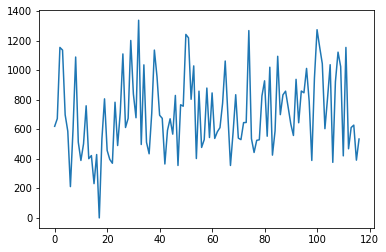

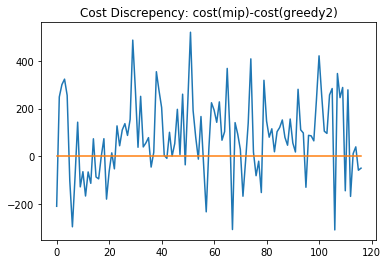

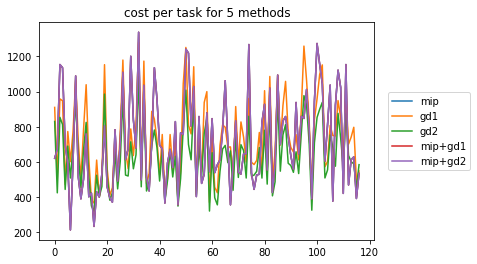

['mip', 'gd1', 'gd2', 'mip_gd1', 'mip_gd2']
optimal cost:  [32, 0, 84]
5


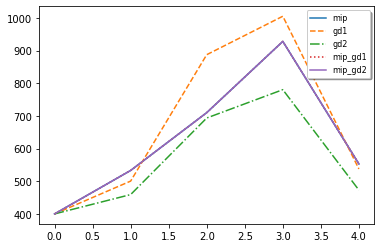

0.0


In [6]:
#@jiachen wang
#analysis of cost
import matplotlib.pyplot as plt
import pickle
import numpy as np
mip_file="MIP_result"
mip_gd1_file="MIP_GD1_result"
mip_gd2_file="MIP_GD2_result"

cost={}
time={}

pure_mip_result=pickle.load(open(mip_file, 'rb'))
gd1_result=pickle.load(open(mip_gd1_file,'rb'))
gd2_result=pickle.load(open(mip_gd2_file,'rb'))

cost["mip"]=pure_mip_result["pure_mip_value"]
cost["gd1"]=gd1_result["gd1_cost"]
cost["gd2"]=gd2_result["gd2_cost"]
cost["mip_gd1"]=gd1_result["mip_gd1_value"]
cost["mip_gd2"]=gd2_result["mip_gd2_value"]

# print(len(cost["mip_gd2"]))

original_cost=list(cost.values())
original_cost_label=list(cost.keys())

mip_cost=cost["mip"]
mip_cost[17]=0
gd1_cost=cost["gd1"]
gd2_cost=cost["gd2"]
mip_gd1_cost=cost["mip_gd1"]
mip_gd2_cost=cost["mip_gd2"]

mip_gd1_cost[17]=0
mip_gd2_cost[17]=0
plt.plot(mip_gd2_cost)
plt.show()

diff=[]
#: negative means mip is superior than greedy2
pure_mip_best_cnt=0
for i in range(len(mip_cost)):
    difference=mip_cost[i]-gd2_cost[i]
    diff.append(difference)
    if difference<0:
        pure_mip_best_cnt+=1
diff[17]=0
plt.plot(diff)
plt.plot([0 for i in range(117)])
plt.title("Cost Discrepency: cost(mip)-cost(greedy2)")
plt.savefig("cost discrepency", bbox_inches='tight')
plt.show()

mip_cost[17]=mip_gd1_cost[17]=mip_gd2_cost[17]=gd1_cost[17]=gd2_cost[17]=400
plt.plot(mip_cost,label='mip')
plt.plot(gd1_cost,label='gd1')
plt.plot(gd2_cost,label='gd2')
plt.plot(mip_gd1_cost,label='mip+gd1')
plt.plot(mip_gd2_cost,label='mip+gd2')
plt.legend(loc='upper center',fancybox=True, shadow=True, fontsize=8)
plt.title("cost per task for 5 methods")
plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)
plt.savefig("cost per task for 5 methods", bbox_inches='tight')
plt.show()

#find optimal count
optimal_cost=[0,0,0]
for i in range(len(mip_cost)):
    if i==17:
        continue
    cur_value=[]
    for j in range(3):
        cur_value.append(original_cost[j][i])
    idx=np.argmin(cur_value)
    optimal_cost[idx]+=1
print(original_cost_label)
print("optimal cost: ",optimal_cost)

extract_index=[17 ,18, 37, 80, 81]
ls=['-','--','-.',':','-']

print(len(original_cost))
cnt=0
for i in original_cost:
    ab_cost=[]
    for j in extract_index:
        ab_cost.append(i[j])
    plt.plot(ab_cost,label=original_cost_label[cnt],linestyle=ls[cnt])
    cnt+=1
plt.legend(loc='upper right', shadow=True, fontsize=8)
plt.show()

print(sum(np.asarray(mip_cost)-np.asarray(mip_gd2_cost)))

0.24184131826091015
0.11869005056527945
0.11869005056527945
0.253805337808071
0.22165783042581672
mip [5.91709614e-01 7.95200109e-01 1.45094347e+00 4.44103408e+01
 1.51620271e+02 2.79151423e+02 5.97426754e+02 6.72129305e+02]
gd1 [0.25501037 0.26200128 0.31299567 0.34300137 0.34401369 0.4160006
 0.42599916 0.91200209]
gd2 [0.25501037 0.26200128 0.31299567 0.34300137 0.34401369 0.4160006
 0.42599916 0.91200209]
mip_gd1 [  0.57800293   0.6870029    0.70199871   0.81601262   1.00600219
   1.03099942 401.70708251 502.80358577]
mip_gd2 [0.44095659 0.49000859 0.50500607 0.54012609 0.57453847 0.65536618
 0.76501155 1.10000014]
mip [ 2 17 18 37 80 81]
gd1 []
gd2 []
mip_gd1 [  2  79  80 111]
mip_gd2 [34]


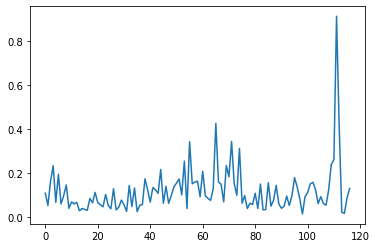

[27.40768957 12.55731058 12.55731058 28.0212822  24.37541246]
mean time:  20.983801078796386
mip stuck:  [17 18 37 80 81]
mip gd1 abnormal:  [ 53 111   2  80  79]


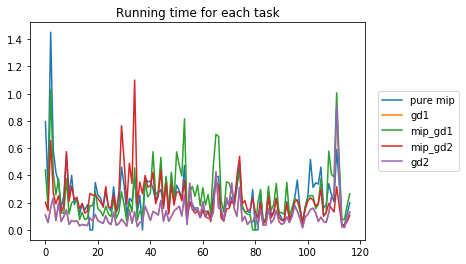

In [7]:
#analysis of time 

import numpy as np
time["mip"]=pure_mip_result["pure_mip_time"]
time["gd1"]=gd1_result["gd1_time"]
time["gd2"]=gd1_result["gd2_time"]
time["mip_gd1"]=gd1_result["mip_gd1_time"]
time["mip_gd2"]=gd2_result["mip_gd2_time"]

original_time=list(time.values())
original_time_label=list(time.keys())

#filter
original_filter=[]
for i in range(5):
    cur=original_time[i]
    cur=np.sort(np.asarray(cur))

    cur=np.multiply(cur,cur<10)
    print(cur.mean())
mip_time=np.asarray(time["mip"])
gd1_time=np.asarray(time["gd1"])
mip_gd1_time=np.asarray(time["mip_gd1"])
mip_gd2_time=np.asarray(time["mip_gd2"])
gd2_time=np.asarray(time["gd2"])

time_value=list(time.values())

for i in range(len(time_value)):
    cur_method_t=np.asarray(time_value[i])
    cur_max_time=np.asarray(sorted(cur_method_t)[-8:])
    print(list(time.keys())[i],cur_max_time)
#     print(list(time.keys())[i],np.flatnonzero((cur_method_t>5)))
for i in range(len(time_value)):
    cur_method_t=np.asarray(time_value[i])
#     cur_max_time=np.asarray(sorted(cur_method_t)[-8:])
#     print(list(time.keys())[i],cur_max_time)
    print(list(time.keys())[i],np.flatnonzero((cur_method_t>1)))

plt.plot(gd2_time)
plt.show()

total_time_except_abnormal=np.zeros(5)
ab=[17,18,37,79,80,81,111]
# ab=[]
for i in range(len(mip_time)):
    if (i in ab):
        continue
    cur_time=[]
    for j in range(5):
        cur_time.append(original_time[j][i])
        total_time_except_abnormal[j]+=original_time[j][i]
print(total_time_except_abnormal)
print("mean time: ",np.mean(np.asarray(total_time_except_abnormal),axis=0))
        
mip_stuck=np.flatnonzero((mip_time>5))
# mip_gd1

print("mip stuck: ",mip_stuck)

mip_time[17]=0
mip_time[80]=0
mip_time[81]=0
mip_time[18]=0
mip_time[37]=0

#find abnormal for mip_gd1
mip_ab=np.argsort(mip_gd1_time)[-5:]
print("mip gd1 abnormal: ",mip_ab)
mip_gd1_time[80]=0
mip_gd1_time[79]=0

plt.plot(mip_time,label="pure mip")
plt.plot(gd1_time,label="gd1")
plt.plot(mip_gd1_time,label="mip_gd1")
plt.plot(mip_gd2_time,label="mip_gd2")
plt.plot(gd2_time,label="gd2")
plt.title("Running time for each task")
plt.legend(loc='upper right', shadow=True, fontsize=10)
plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)
plt.savefig("time comparision",bbox_inches='tight')
plt.show()

In [3]:
#infeasible greedy1
gd1_fail=np.asarray([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])
print(len(gd1_fail))
gd1_fail=np.flatnonzero((gd1_fail==1))
print(gd1_fail)
# print(haha==0)
gd1_fail=gd1_fail+3

gd1_fail

120
[  7   9  11  12  13  69  80  81  95 108 111 112 116]


array([ 10,  12,  14,  15,  16,  72,  83,  84,  98, 111, 114, 115, 119],
      dtype=int64)

In [5]:
#infeasible greedy2
gd2_fail=np.asarray([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
gd2_fail=np.flatnonzero((gd2_fail==1))
print(gd2_fail)
# print(haha==0)
gd2_fail=gd2_fail+3
gd2_fail

[ 12  32  58 108]


array([ 15,  35,  61, 111], dtype=int64)